1. Explanatory Dataset

In [ ]:
# Import library yang diperlukan

# 1. Pandas untuk manipulasi dan analisis data, terutama dengan struktur DataFrame.
import pandas as pd

# 2. NumPy untuk operasi matematis dan komputasi array n-dimensi.
import numpy as np

# 3. LabelBinarizer dari sklearn.preprocessing untuk mengonversi label kategori
#    menjadi format biner (one-hot encoding).
from sklearn.preprocessing import LabelBinarizer

# 4. KNeighborsClassifier dari sklearn.neighbors adalah algoritma K-Nearest Neighbors (KNN)
#    untuk klasifikasi berbasis jarak.
from sklearn.neighbors import KNeighborsClassifier

# 5. Fungsi-fungsi evaluasi dari sklearn.metrics:
#    - accuracy_score: untuk menghitung akurasi prediksi.
#    - precision_score: untuk menghitung presisi model.
#    - recall_score: untuk menghitung sensitivitas (recall).
#    - f1_score: untuk menghitung rata-rata harmonik antara presisi dan recall.
#    - classification_report: untuk menampilkan ringkasan metrik evaluasi.
#    - matthews_corrcoef: untuk menghitung koefisien korelasi Matthews.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, matthews_corrcoef
)

# 6. Fungsi `euclidean` dari scipy.spatial.distance untuk menghitung jarak Euclidean
#    antara dua titik dalam ruang n-dimensi.
from scipy.spatial.distance import euclidean

# 7. Matplotlib untuk membuat visualisasi data (plotting).
import matplotlib.pyplot as plt

# 8. Seaborn untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dzuuul","key":"ccb9e824d7f2c983c0e167aeced8c73c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d yersever/500-person-gender-height-weight-bodymassindex
!unzip /content/500-person-gender-height-weight-bodymassindex.zip

Dataset URL: https://www.kaggle.com/datasets/yersever/500-person-gender-height-weight-bodymassindex
License(s): GPL-2.0
500-person-gender-height-weight-bodymassindex.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/500-person-gender-height-weight-bodymassindex.zip
replace 500_Person_Gender_Height_Weight_Index.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# Membaca dataset

df = pd.read_csv('/content/500_Person_Gender_Height_Weight_Index.csv')

In [ ]:
# Tampilkan beberapa baris pertama dataset untuk melihat struktur data

df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
# Memeriksa data yang hilang

print(df.isnull().sum())

Gender    0
Height    0
Weight    0
Index     0
dtype: int64


In [ ]:
# Melihat informasi umum tentang dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None


In [ ]:
# Melihat statistik deskriptif untuk kolom numerik

print(df.describe())

           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000


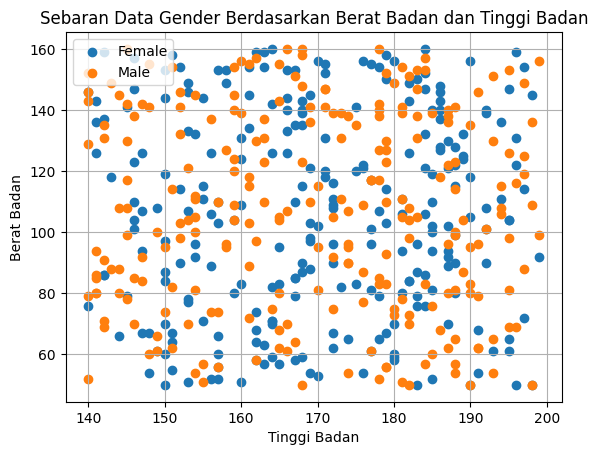

In [ ]:
 # Visualisasi Data

# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'Gender'
for Height, d in df.groupby('Gender'):
    # Membuat scatter plot untuk setiap grup
    # x = data 'Height' (TB), y = data 'Weight' (BB)
    # 'label=Height' memberikan label untuk setiap grup (diambil dari nilai kolom 'Gender')
    ax.scatter(d['Height'], d['Weight'], label=Height)

# Menambahkan legenda untuk membedakan grup berdasarkan 'Gender'
plt.legend(loc='upper left')

# Menambahkan judul pada plot
plt.title('Sebaran Data Gender Berdasarkan Berat Badan dan Tinggi Badan')

# Menambahkan label pada sumbu x (TB)
plt.xlabel('Tinggi Badan')

# Menambahkan label pada sumbu y (BB)
plt.ylabel('Berat Badan')

# Menambahkan grid untuk mempermudah pembacaan plot
plt.grid(True)

# Menampilkan plot ke layar
plt.show()

2. Preprocessing Dengan Label Binarizer

In [ ]:
# Mengonversi kolom 'Height' dan 'Weight' dari DataFrame df menjadi array NumPy 2D
# Data ini digunakan sebagai fitur (input) untuk model machine learning
x_train = np.array(df[['Height', 'Weight']])

# Mengonversi kolom 'Gender' dari DataFrame df menjadi array NumPy 1D
# Data ini digunakan sebagai label (output) untuk model machine learning
y_train = np.array(df['Gender'])

# Mencetak isi x_train (fitur/input) dengan format array NumPy
print(f'x_train:\n{x_train}\n')

# Mencetak isi y_train (label/output) dengan format array NumPy
print(f'y_train: {y_train}')

x_train:
[[174  96]
 [189  87]
 [185 110]
 [195 104]
 [149  61]
 [189 104]
 [147  92]
 [154 111]
 [174  90]
 [169 103]
 [195  81]
 [159  80]
 [192 101]
 [155  51]
 [191  79]
 [153 107]
 [157 110]
 [140 129]
 [144 145]
 [172 139]
 [157 110]
 [153 149]
 [169  97]
 [185 139]
 [172  67]
 [151  64]
 [190  95]
 [187  62]
 [163 159]
 [179 152]
 [153 121]
 [178  52]
 [195  65]
 [160 131]
 [157 153]
 [189 132]
 [197 114]
 [144  80]
 [171 152]
 [185  81]
 [175 120]
 [149 108]
 [157  56]
 [161 118]
 [182 126]
 [185  76]
 [188 122]
 [181 111]
 [161  72]
 [140 152]
 [168 135]
 [176  54]
 [163 110]
 [172 105]
 [196 116]
 [187  89]
 [172  92]
 [178 127]
 [164  70]
 [143  88]
 [191  54]
 [141 143]
 [193  54]
 [190  83]
 [175 135]
 [179 158]
 [172  96]
 [168  59]
 [164  82]
 [194 136]
 [153  51]
 [178 117]
 [141  80]
 [180  75]
 [185 100]
 [197 154]
 [165 104]
 [168  90]
 [176 122]
 [181  51]
 [164  75]
 [166 140]
 [190 105]
 [186 118]
 [168 123]
 [198  50]
 [175 141]
 [145 117]
 [159 104]
 [185 140]
 

In [ ]:
# Membuat objek LabelBinarizer, yang digunakan untuk mengonversi label kategori menjadi format biner
lb = LabelBinarizer()

# Menggunakan LabelBinarizer untuk mengonversi y_train (label asli) menjadi format biner
# fit_transform() secara otomatis melakukan dua hal:
# 1. Menyesuaikan LabelBinarizer dengan data (fit)
# 2. Mengonversi data sesuai dengan skema biner (transform)
y_train = lb.fit_transform(y_train)

# Mencetak hasil y_train setelah dikonversi ke format biner
print(f'y_train: {y_train}')

y_train: [[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 

In [ ]:
# Mengubah array 2D y_train menjadi array 1D menggunakan fungsi flatten()
# Setelah LabelBinarizer, y_train berbentuk array 2D dengan setiap label dalam format biner,
# seperti [[0], [1], [1], ...]. flatten() mengubahnya menjadi [0, 1, 1, ...].
y_train = y_train.flatten()

# Mencetak hasil y_train setelah diubah menjadi array 1D
print(f'y_train: {y_train}')

y_train: [1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1
 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0
 0 0 1 0 1 0 1 1

3. Training KNN Classification Model

In [ ]:
# Menentukan jumlah nearest neighbors/tetangga terdekat (K) yang digunakan dalam algoritma K-Nearest Neighbors (KNN)
K = 3

# Membuat objek model KNeighborsClassifier dengan parameter n_neighbors=K
# n_neighbors menentukan jumlah tetangga yang akan dipertimbangkan dalam proses klasifikasi
model = KNeighborsClassifier(n_neighbors=K)

# Melatih model KNN menggunakan data latih (x_train) dan label latih (y_train)
# model.fit() akan menemukan pola dalam data latih untuk kemudian digunakan dalam prediksi
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

4. Prediksi dengan KNN Classification Model

In [ ]:
# Menetapkan nilai tinggi badan (N_Height) dan berat badan (N_Weight) untuk data baru
N_Height = 170
N_Weight = 65

# Membuat array NumPy dengan data baru [N_Height, N_Weight] dan mengubahnya menjadi array 2D dengan 1 baris
x_new = np.array([N_Height, N_Weight]).reshape(1, -1)

# Menampilkan x_new untuk memverifikasi format data baru sebagai array 2D dengan 1 baris
x_new


array([[170,  65]])

In [ ]:
# Menggunakan model yang telah dilatih (model) untuk memprediksi label dari data baru (x_new)
# model.predict(x_new) akan mengembalikan hasil prediksi berdasarkan input data baru
y_new = model.predict(x_new)

# Menampilkan hasil prediksi y_new yang berisi label (outcome) untuk data baru
y_new

array([0])

In [ ]:
# Menggunakan inverse_transform() dari LabelBinarizer untuk mengonversi hasil prediksi (y_new)
# dari format biner kembali ke label asli.
# Ini diperlukan karena LabelBinarizer mengubah label menjadi format biner selama pelatihan,
# dan kita ingin mengembalikannya ke format aslinya (misalnya, Male atau Female).
lb.inverse_transform(y_new)

array(['Female'], dtype='<U6')

5. Visualisasi Nearest Neighbours

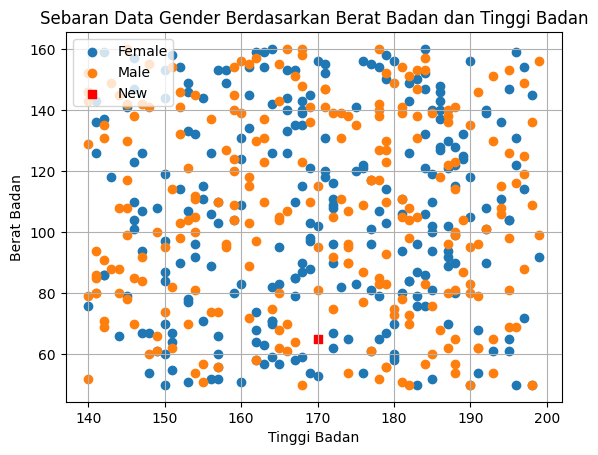

In [ ]:
# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'Gender'
for Height, d in df.groupby('Gender'):
    # Membuat scatter plot untuk setiap grup
    # x = data 'Height' (TB), y = data 'Weight' (BB)
    # 'label=Height' memberikan label untuk setiap grup (diambil dari nilai kolom 'Gender')
    ax.scatter(d['Height'], d['Weight'], label=Height)

# Menambahkan titik data baru (N_Height, N_Weight) dengan gaya khusus
# Titik ini digambarkan dengan bentuk persegi ('marker='s'') dan warna hijau
# Label 'Misterius' akan muncul di legenda untuk titik ini
plt.scatter(N_Height,
            N_Weight,
            marker='s',  # Menandakan titik data baru menggunakan bentuk persegi
            color='red',  # Menentukan warna titik data baru menjadi merah
            label='New')  # Label untuk titik data baru

# Menambahkan legenda untuk membedakan grup berdasarkan 'Gender' dan data baru 'New'
plt.legend(loc='upper left')

# Menambahkan judul pada plot
plt.title('Sebaran Data Gender Berdasarkan Berat Badan dan Tinggi Badan')

# Menambahkan label pada sumbu x (TB)
plt.xlabel('Tinggi Badan')

# Menambahkan label pada sumbu y (BB)
plt.ylabel('Berat Badan')

# Menambahkan grid ke plot untuk mempermudah pembacaan visual
plt.grid(True)

# Menampilkan plot ke layar
plt.show()


6. Kalkulasi Distance (Euclidean Distance)

In [ ]:
# Membuat array NumPy baru dengan data tinggi badan (N_Height) dan berat badan (N_Weight)
# Data ini disimpan dalam array 1D yang berisi dua nilai: tinggi badan dan berat badan
New = np.array([N_Height, N_Weight])

# Menampilkan array 'New' yang berisi nilai tinggi badan dan berat badan
New

array([170,  65])

In [ ]:
# 'x_train' adalah array atau DataFrame yang berisi data latih (fitur) yang digunakan untuk melatih model
# Dalam konteks ini, 'x_train' berisi dua kolom fitur: 'Height' (TB) dan 'Weight' (BB),
x_train

array([[174,  96],
       [189,  87],
       [185, 110],
       [195, 104],
       [149,  61],
       [189, 104],
       [147,  92],
       [154, 111],
       [174,  90],
       [169, 103],
       [195,  81],
       [159,  80],
       [192, 101],
       [155,  51],
       [191,  79],
       [153, 107],
       [157, 110],
       [140, 129],
       [144, 145],
       [172, 139],
       [157, 110],
       [153, 149],
       [169,  97],
       [185, 139],
       [172,  67],
       [151,  64],
       [190,  95],
       [187,  62],
       [163, 159],
       [179, 152],
       [153, 121],
       [178,  52],
       [195,  65],
       [160, 131],
       [157, 153],
       [189, 132],
       [197, 114],
       [144,  80],
       [171, 152],
       [185,  81],
       [175, 120],
       [149, 108],
       [157,  56],
       [161, 118],
       [182, 126],
       [185,  76],
       [188, 122],
       [181, 111],
       [161,  72],
       [140, 152],
       [168, 135],
       [176,  54],
       [163,

In [ ]:
# Menghitung jarak Euclidean antara data baru (New) dan setiap data dalam x_train
# Jarak Euclidean dihitung untuk setiap elemen (d) dalam x_train menggunakan list comprehension
data_jarak = [euclidean(New, d) for d in x_train]

# Menampilkan list 'data_jarak' yang berisi jarak Euclidean antara data baru (New) dan setiap data latih
data_jarak

[31.25699921617557,
 29.068883707497267,
 47.43416490252569,
 46.32493928760188,
 21.37755832643195,
 43.382023926967726,
 35.4682957019364,
 48.703182647543684,
 25.317977802344327,
 38.01315561749642,
 29.68164415931166,
 18.601075237738275,
 42.190046219457976,
 20.518284528683193,
 25.238858928247925,
 45.31004303683677,
 46.84015371452148,
 70.68238818828917,
 84.11896337925236,
 74.02702209328699,
 46.84015371452148,
 85.70297544426332,
 32.01562118716424,
 75.50496672405067,
 2.8284271247461903,
 19.026297590440446,
 36.05551275463989,
 17.26267650163207,
 94.26027795418386,
 87.46427842267951,
 58.52349955359813,
 15.264337522473747,
 25.0,
 66.75327707311455,
 88.95504482602435,
 69.6419413859206,
 55.94640292279746,
 30.01666203960727,
 87.00574693662483,
 21.93171219946131,
 55.226805085936306,
 47.853944456021594,
 15.811388300841896,
 53.75872022286245,
 62.16912416947821,
 18.601075237738275,
 59.77457653551382,
 47.29693436154187,
 11.40175425099138,
 92.02716990106781,


In [ ]:
# Menambahkan kolom baru ke DataFrame 'df' dengan nama 'jarak' yang berisi data jarak Euclidean
# 'data_jarak' adalah list yang berisi jarak Euclidean antara data baru (New) dan setiap data dalam x_train.
df['jarak'] = data_jarak

# Mengurutkan DataFrame 'df' berdasarkan kolom 'jarak' secara ascending (default)
# Ini akan mengurutkan data berdasarkan jarak terdekat ke data baru (New).
df.sort_values(['jarak'])

,Gender,Height,Weight,Index,jarak
24,Female,172,67,2,2.828427
477,Male,167,64,2,3.162278
333,Female,172,62,2,3.605551
238,Female,174,65,2,4.000000
241,Male,166,61,2,5.656854
...,...,...,...,...,...
100,Male,199,156,4,95.509162
123,Female,184,160,5,96.026038
213,Female,196,159,5,97.529483
247,Female,142,159,5,98.081599


7. Evaluasi KNN Classification Model

In [ ]:
# Testing Set

# Membuat array NumPy untuk data uji (x_test), yang berisi fitur yang akan diuji oleh model
# Setiap baris dalam 'x_test' berisi dua nilai: tinggi badan (TB) dan berat badan (BB) untuk masing-masing data uji
x_test = np.array([[175, 50], [145, 40], [150, 43], [180, 55]])

# Membuat array NumPy untuk label target uji (y_test), yang berisi hasil target untuk masing-masing data uji
# Label target adalah 'Male' atau 'Female', yang diubah menjadi format biner menggunakan LabelBinarizer
# Fungsi 'transform()' mengonversi label asli ('Male' dan 'Female') menjadi angka biner (1 untuk 'Male', 0 untuk 'Female')
y_test = lb.transform(np.array(['Male', 'Female', 'Male', 'Female'])).flatten()

# Menampilkan nilai 'x_test' yang berisi fitur dari data uji (tinggi badan dan berat badan)
print(f'x_test:\n{x_test}\n')

# Menampilkan nilai 'y_test' yang berisi label target dalam format biner (0 atau 1)
print(f'y_test: {y_test}')

x_test:
[[175  50]
 [145  40]
 [150  43]
 [180  55]]

y_test: [1 0 1 0]


In [ ]:
# Prediksi terhadap testing set

# Menggunakan model yang telah dilatih untuk membuat prediksi berdasarkan data uji (x_test)
# 'model.predict()' akan memprediksi label target (misalnya, 'Male' atau 'Female') untuk setiap data di 'x_test'
y_pred = model.predict(x_test)

# Menampilkan hasil prediksi yang disimpan dalam variabel 'y_pred'
# 'y_pred' berisi array dengan prediksi model untuk setiap data uji dalam 'x_test'
y_pred

array([1, 0, 0, 1])

8. Evaluasi Model Dengan Accuracy Score

In [ ]:
# Menghitung akurasi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'accuracy_score()' dari sklearn.metrics akan menghitung persentase prediksi yang benar dari total prediksi
acc = accuracy_score(y_test, y_pred)

# Menampilkan nilai akurasi yang dihitung
print(f'Accuracy: {acc}')

Accuracy: 0.5


9. Evaluasi Model Dengan Precision Score

In [ ]:
# Menghitung presisi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'precision_score()' dari sklearn.metrics digunakan untuk menghitung presisi
# Presisi adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh prediksi positif (True Positives + False Positives)
prec = precision_score(y_test, y_pred)

# Menampilkan nilai presisi yang dihitung
print(f'Precision: {prec}')

Precision: 0.5


10. Evaluasi Model Dengan Recall Score

In [ ]:
# Menghitung recall (sensitivitas) model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'recall_score()' dari sklearn.metrics digunakan untuk menghitung recall
# Recall adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh data yang sebenarnya positif (True Positives + False Negatives)
rec = recall_score(y_test, y_pred)

# Menampilkan nilai recall yang dihitung
print(f'Recall: {rec}')

Recall: 1.0


11. Evaluasi Model Dengan F1 Score

In [ ]:
# Menghitung F1 score model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'f1_score()' dari sklearn.metrics digunakan untuk menghitung F1 score
# F1 score adalah rata-rata harmonis antara presisi dan recall, yang memberikan keseimbangan antara keduanya
# Formula F1 score adalah: F1 = 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)

# Menampilkan nilai F1 score yang dihitung
print(f'F1 Score: {f1}')

F1 Score: 0.5


12. Evaluasi Model Dengan Classification Report

In [ ]:
# Menghitung laporan klasifikasi untuk menilai kinerja model dalam hal presisi, recall, f1 score, dan akurasi
# Fungsi 'classification_report()' dari sklearn.metrics menghasilkan laporan evaluasi yang lebih lengkap
# Laporan ini mencakup metrik-metrik seperti presisi, recall, F1 score, dan support untuk setiap kelas (misalnya, 'Male' dan 'Female')
cls_report = classification_report(y_test, y_pred)

# Menampilkan laporan klasifikasi yang dihitung
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



13. Evaluasi Model Dengan Matthews Correlation Coefficient (MCC)

In [ ]:
# Menghitung Matthews Correlation Coefficient (MCC) untuk menilai kinerja model secara keseluruhan
# Fungsi 'matthews_corrcoef()' dari sklearn.metrics digunakan untuk menghitung MCC
# MCC adalah metrik yang mengukur kualitas prediksi dalam masalah klasifikasi biner
# Nilai MCC berkisar antara -1 (prediksi sepenuhnya salah) hingga +1 (prediksi sepenuhnya benar),
# dan nilai 0 menunjukkan prediksi acak atau model yang tidak lebih baik dari tebakan acak
mcc = matthews_corrcoef(y_test, y_pred)

# Menampilkan nilai MCC yang dihitung
print(f'MCC: {mcc}')

MCC: 0.0
